<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_TentMapSensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensitivity of the tent map

For $\mu > 1$, fixed point iterations with the [Tent Map](https://en.wikipedia.org/wiki/Tent_map) are highly ill-conditioned, meaning that small changes in the input (e.g., starting point) lead to very different long-run behavior.  We see an exmaple of this, for $x= 0.6$ starting one iteration sequence, and another iteration sequence is identical except it starts at $y= 0.5 + 10^{-14}$. For a while, both sequences behave the same...

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mu = 1.5
g  = lambda x : mu*( -abs(x-.5) + .5 )

x  = .6
y  = x + 1e-14

N   = int(1e2)
X   = np.zeros(N)
Y   = np.zeros(N)
for i in range(N):
  X[i] = x
  Y[i] = y
  print("Iter {:4d}, (x,y) are ({:12.10f}, {:12.10f}), and |x-y| is {:13.10f}".format(i,x,y,abs(x-y)))
  x   = g(x)
  y   = g(y)

Iter    0, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    1, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    2, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    3, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    4, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    5, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    6, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    7, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    8, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter    9, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter   10, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter   11, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is  0.0000000000
Iter   12, (x,y) are (0.6000000000, 0.6000000000), and |x-y| is 

We see that while both starting points lead to almost the same sequences for a while, after about 70 iterations, the sequences start to look quite different. Another way to see this is with a plot:

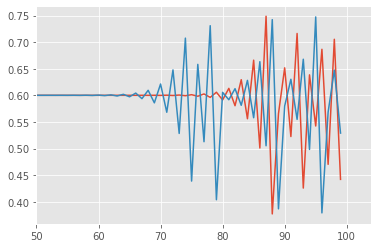

In [ ]:
plt.plot( X );
plt.plot( Y );
plt.xlim(left=50);

Another  thing we can ask for is the correlation (see [Python correlation tutorial](https://realpython.com/numpy-scipy-pandas-correlation-python/)). For the first 60 terms of the sequence, the two sequences are highly correlated (well, both sequences are nearly static; we see a negative correlation, but don't read too much into this)

In [ ]:
c = np.corrcoef( X[:60], Y[:60] )
print("The Pearson correlation, for the first 60 terms, is ", c[0][1] )

The Pearson correlation, for the first 60 terms, is  -0.9999999999999999


Now ask for the correlation of the last 30 terms. We see it's closer to 0 (uncorrelated).

In [ ]:
c = np.corrcoef( X[-30:], Y[-30:] )
print("The Pearson correlation, for the last 30 terms, is ", c[0][1] )

The Pearson correlation, for the last 30 terms, is  -0.3737995526768398


# Logistic map

$$g(x) = r\cdot x(1-x), \quad x\in[0,1], r\in[0,4]$$
is another famous example; see Ch 10 in Steven Strogatz "Nonlinear Dynamics and Chaos", 2nd ed. (2015).  See [Logistic map (wikipedia)](https://en.wikipedia.org/wiki/Logistic_map)

This is a discrete-time version of logistic population growth

For $r<1$, $p=0$ is a stable fixed point. For $1<r<3$, there's also a steady state. For $4=3.3$, the fixed point iteration oscillates with period-2. For $r=3.5$ it has period-4. Period doublings keep occuring until $r\approx 3.569946$. Beyond here, usually the behavior is chaotic though a few values of $r$ (e.g., near 3.83) have periodic cyles. Orbit diagrams show this nicely.

![orbit diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Logistic_Bifurcation_map_High_Resolution.png/320px-Logistic_Bifurcation_map_High_Resolution.png)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
r = 3.3
g  = lambda x : r*x*(1-x)

x  = .6

N   = int(1e2)
X   = np.zeros(N)
for i in range(N):
  X[i] = x
  x   = g(x)

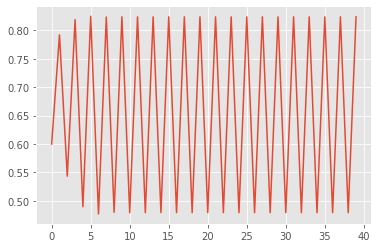

In [3]:
plt.plot(X[:40]);

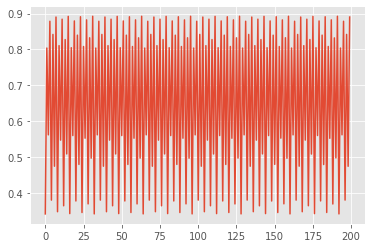

In [5]:
r = 3.57
g  = lambda x : r*x*(1-x)

x  = .6

N   = int(1e3)
X   = np.zeros(N)
for i in range(N):
  X[i] = x
  x   = g(x)
plt.plot(X[-200:]);